In [1]:
import numpy
import pandas

import json

from matplotlib import pyplot as plt

from helpers import network, plotting

In [48]:
fn1 = "configs/sscx_placement_4.json"
fn2 = "configs/sscx_rewired_placement_4.json"

with open(fn1, "r") as fid:
    cfg1 = json.load(fid)

with open(fn2, "r") as fid:
    cfg2 = json.load(fid)

In [49]:
M1 = network.load_network(cfg1["connectome"]["loading"])    
Msmpl1 = network.filter_network(M1, cfg1["connectome"]["subnetwork"]["simplices"])

M2 = network.load_network(cfg2["connectome"]["loading"])    
Msmpl2 = network.filter_network(M2, cfg2["connectome"]["subnetwork"]["simplices"])

In [29]:
import h5py
import pandas
fnh5 = "save/microns_results2.h5"
res = []
with h5py.File(fnh5, "r") as h5:
    grp = h5["simplex_counts"]
    for k in grp.keys():
        res.append(pandas.read_hdf(fnh5, key="simplex_counts/{0}".format(k)))
        
res = pandas.concat(res, axis=1)

,simplices,simplices,simplices,simplices,simplices,simplices,simplices,simplices,simplices,simplices,simplices,simplices,simplices,simplices,simplices
dim,,,,,,,,,,,,,,,
0,15410.0,15346.0,13911.0,13456.0,13535.0,13513.0,13071.0,14718,15066.0,14992.0,14432,14623.0,14559.0,14022.0,13979.0
1,878954.0,938548.0,740426.0,753723.0,640594.0,675903.0,688959.0,954146,847965.0,894451.0,908106,783769.0,819869.0,829358.0,705843.0
2,2866984.0,3455367.0,2248142.0,2680180.0,1596409.0,1903795.0,2264154.0,4267251,2586099.0,3024525.0,3700426,2240874.0,2583693.0,3070948.0,1916463.0
3,2018214.0,2926726.0,1350721.0,2299679.0,747947.0,1088645.0,1835106.0,5289715,1510968.0,2039453.0,3680908,1193377.0,1570749.0,2646144.0,976071.0
4,605777.0,1125630.0,276408.0,926521.0,115351.0,216122.0,738666.0,3686806,298924.0,485910.0,1690126,212858.0,321366.0,1021301.0,168828.0
5,97814.0,242517.0,23509.0,208500.0,7597.0,18369.0,175853.0,1990009,24368.0,50028.0,449047,15861.0,27539.0,218011.0,12539.0
6,7571.0,26237.0,904.0,24858.0,263.0,762.0,22637.0,865477,820.0,2196.0,72409,505.0,1097.0,25239.0,402.0
7,277.0,1022.0,22.0,1327.0,NaN,18.0,1223.0,253657,8.0,45.0,6410,6.0,29.0,1338.0,5.0
8,16.0,18.0,NaN,37.0,NaN,NaN,37.0,40970,NaN,NaN,179,NaN,NaN,37.0,NaN


In [50]:
from connalysis.network import topology

C1 = topology.simplex_counts(Msmpl1.matrix)
C2 = topology.simplex_counts(Msmpl2.matrix)

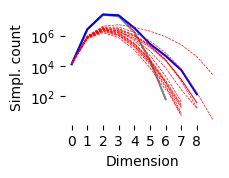

In [46]:
# 2
fig = plt.figure(figsize=(2., 1.5))
ax = fig.gca()

ax.plot(C1, color="grey")
ax.plot(C2, color="blue")
ax.plot(res, color="red", lw=0.5, ls="--")
ax.set_frame_on(False)
ax.set_yscale("log")

ax.set_xticks(range(9))
ax.set_xlabel("Dimension")
ax.set_ylabel("Simpl. count")

fig.savefig("plots/sscx_enhanced/simplex_counts_compare.pdf")

In [47]:
32000 / Msmpl2.matrix.nnz

0.012018350518948619